In [ ]:
# Prof wanted to see how abnormal levels of the four metrics ; haemoglobin, bmi, glucose, systolic pressure are distributed 

In [1]:
import re
import pandas as pd
pdf = pd.read_stata("IAIR7EFL.DTA",convert_categoricals = False)

In [14]:
table = pd.read_csv('Table on 12th Feb for NFHS 4.csv')

In [15]:
table['normal glucose'] = (table['High glucose'] != 1).astype(int)

Venn diagram 

In [7]:
!pip install venn
import pandas as pd
import matplotlib.pyplot as plt
from venn import venn

def plot_venn_4(df, features):
    assert len(features) == 4, "Provide exactly 4 feature names (NFHS-5)"

    data_dict = {feature: set(df.index[df[feature] == 1]) for feature in features}
    
    
    venn(data_dict)
    plt.title("Venn Diagram for 4 Features")
    plt.show()


In [8]:
def plot_venn_4_not(df, features):
    assert len(features) == 4, "Provide exactly 4 feature names (NFHS-5)"

    # Replace the first word of each feature with 'abnormal'
    data_dict = {
        'abnormal ' + ' '.join(feature.split()[1:]): set(df.index[df[feature] == 0])
        for feature in features
    }

    venn(data_dict)
    plt.title("Venn Diagram for 4 Features")
    plt.show()


In [11]:
table.keys()

Index(['normal waist circumference'], dtype='object')

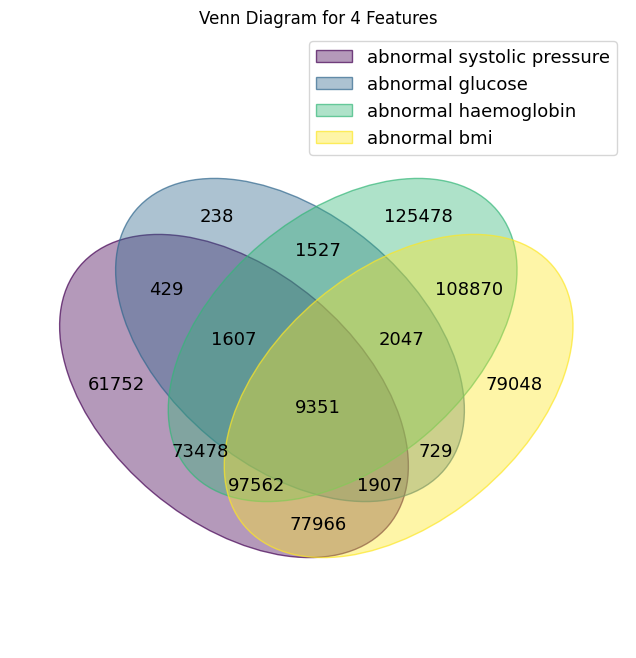

In [16]:
plot_venn_4_not(table,['Normal systolic pressure', 'normal glucose',
       'Normal haemoglobin', 'Normal bmi'])

hierarchical clustering

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = table

# Step 1: Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 2: Compute distance matrix efficiently
distance_matrix = pdist(data_scaled, metric='euclidean')

# Step 3: Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Step 4: Extract clusters (e.g., 5 clusters)
cluster_labels = fcluster(linkage_matrix, t=5, criterion='maxclust')

# Step 5: Optional - Dendrogram (for smaller samples)
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=50)  # Display only the last 50 clusters
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Step 6: Append cluster labels to the original DataFrame
data['Cluster'] = cluster_labels


In [ ]:
table_2.keys()

In [ ]:
table = table_2.iloc[:,-17:]

In [ ]:
table = table.iloc[:,1:]

In [ ]:
table.shape

k-means

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = table
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)  
X_reduced = pca.fit_transform(X_scaled)

#finding the optimal number of clusters using the Elbow Method
distortions = []
silhouette_scores = []
k_values = range(2,5)  

for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1024)   
    labels = kmeans.fit_predict(X_reduced)
    distortions.append(kmeans.inertia_)  
    silhouette_scores.append(silhouette_score(X_scaled, labels))


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')

#silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [ ]:
#k-means with PCA projections

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

X = table

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)


kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# displaying centroids in terms of original features
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids_original, columns=X.columns)
print("Cluster Centroids in Terms of Original Features:")
print(centroids_df)

# Visualizing clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0],  
    pca.transform(kmeans.cluster_centers_)[:, 1],  
    c='red', marker='x', s=100, label='Centroids'
)

plt.title('K-Means Clustering with PCA Projection')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


k-means with UMAP

In [ ]:
#k-means with UMAP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import umap

X = table


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Centroids 
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids_original, columns=X.columns)
print("Cluster Centroids in Terms of Original Features:")
print(centroids_df)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(
    umap_model.transform(kmeans.cluster_centers_)[:, 0],  
    umap_model.transform(kmeans.cluster_centers_)[:, 1],  
    c='red', marker='x', s=100, label='Centroids'
)

plt.title('K-Means Clustering with UMAP Projection')
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


/Applications/anaconda3/envs/umap_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Applications/anaconda3/envs/umap_env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Applications/anaconda3/envs/umap_env/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited at iteration 286 with accuracies 
[3.08379402e-13 6.51668195e-07 1.36168390e-07 3.69883349e-07]
not reaching the requested tolerance 4.470348358154297e-07.
Use iteration 286 instead with accuracy 
2.8943006073641163e-07.

  _, diffusion_map = lobpcg(
/Applications/anaconda3/envs/umap_env/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[7.32859636e-14 6.51668191e-07 1.36168